# question 1

In [147]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.regularizers import l1, l2

In [148]:
#load dataset
df=pd.read_csv("Churn_Modelling.csv")

In [149]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 1. Perform the required pre-processing and write comment lines to explain the pre-processing steps.

In [150]:
#remove unecessary columns
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [151]:
# Convert the categorical 'Geography' column into dummy/indicator variables
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [152]:
# Initialize a LabelEncoder to convert categorical labels into numeric form.
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [153]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [154]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [155]:
X = df.drop('Exited', axis=1).values
y = df['Exited'].values

In [156]:
# Fit the scaler to the feature matrix X and transform X to have standardized values.
scaler = StandardScaler()
X = scaler.fit_transform(X)

#     2. Perform experiments using (80,10,10) split and tabulate performance in terms of Accuracy, Precision & Recall for the following experimental setup:    
        a) Number of Hidden Layers and Number of Units per Layer  
 
Number of Hidden Layers 
Number of Units 
1 
128, 0 ,0 
2 
128, 64, 0 
3 
128, 64, 32 
 
        b) Epochs (10,20,30)  
        c) Activation function (Sigmoid, ReLU )  
        d) Without Regularization, with Regularization (L1/L2)  
        e) Learning rate (0.1, 0.01,0.001)  
Visualize the training and validation loss against the epochs and comment on optimal hyperparameters.

In [157]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42, stratify=y_train_full)

In [158]:
epochs_list = [10, 20, 30]
activations = ['sigmoid', 'relu']
reg_names = ['none', 'l1', 'l2']
learning_rates = [0.1, 0.01, 0.001]

results = []

In [159]:

for epochs, activation, reg_name, lr in itertools.product(epochs_list, activations, reg_names, learning_rates):
    print(f"Running: Epochs={epochs}, Activation={activation}, Reg={reg_name}, LR={lr}")
    # Regularizer setup
    if reg_name == 'none':
        regularizer = None
    elif reg_name == 'l1':
        regularizer = l1(0.001)
    elif reg_name == 'l2':
        regularizer = l2(0.001)

Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.001
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.001
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.001
Running: Epochs=10, Activation=relu, Reg=none, LR=0.1
Running: Epochs=10, Activation=relu, Reg=none, LR=0.01
Running: Epochs=10, Activation=relu, Reg=none, LR=0.001
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.1
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.01
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.001
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.1
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.01
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.001
Running

In [160]:
model1 = Sequential()
model1.add(Dense(128, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=regularizer))
model1.add(Dense(1, activation='sigmoid'))

In [161]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [162]:
history = model1.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)

In [163]:
y_pred = model1.predict(X_test) > 0.5
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

32/32 [==============================] - 0s 419us/step


In [164]:
print("ACCURACY:")
print(acc)
print("PRECISION:")
print(prec)
print("RECALL:")
print(rec)

ACCURACY:
0.862
PRECISION:
0.7946428571428571
RECALL:
0.4362745098039216


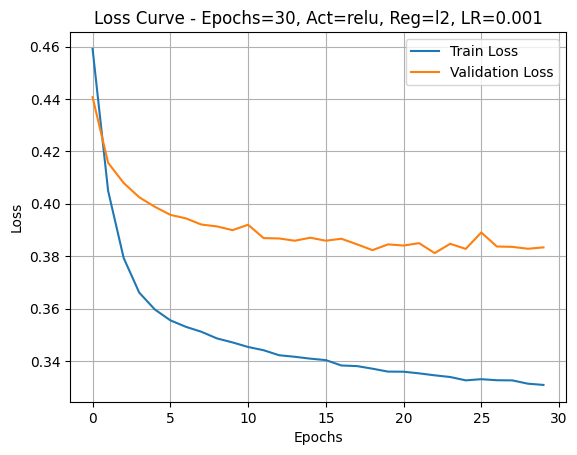

In [98]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss Curve - Epochs={epochs}, Act={activation}, Reg={reg_name}, LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# question 2

In [166]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import itertools
from tensorflow.keras.regularizers import l1, l2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [167]:
df=pd.read_csv("HousingData.csv")

In [168]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [169]:
df = df.fillna(df.mean())

In [170]:
X = df.drop('MEDV', axis=1).values
y = df['MEDV'].values

In [171]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [172]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1111, random_state=42)

In [173]:
epochs_list = [10, 20, 30]
activations = ['sigmoid', 'relu']
reg_names = ['none', 'l1', 'l2']
learning_rates = [0.1, 0.01, 0.001]

In [174]:
for epochs, activation, reg_name, lr in itertools.product(epochs_list, activations, reg_names, learning_rates):
    print(f"Running: Epochs={epochs}, Activation={activation}, Reg={reg_name}, LR={lr}")
    # Regularizer setup
    if reg_name == 'none':
        regularizer = None
    elif reg_name == 'l1':
        regularizer = l1(0.001)
    elif reg_name == 'l2':
        regularizer = l2(0.001)

Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=none, LR=0.001
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=l1, LR=0.001
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.1
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.01
Running: Epochs=10, Activation=sigmoid, Reg=l2, LR=0.001
Running: Epochs=10, Activation=relu, Reg=none, LR=0.1
Running: Epochs=10, Activation=relu, Reg=none, LR=0.01
Running: Epochs=10, Activation=relu, Reg=none, LR=0.001
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.1
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.01
Running: Epochs=10, Activation=relu, Reg=l1, LR=0.001
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.1
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.01
Running: Epochs=10, Activation=relu, Reg=l2, LR=0.001
Running

In [175]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation=activation, kernel_regularizer=regularizer))
model.add(Dense(64, activation=activation, kernel_regularizer=regularizer))
model.add(Dense(32, activation=activation, kernel_regularizer=regularizer))
model.add(Dense(1))

In [176]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

In [177]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=0)

In [178]:
y_pred = model.predict(X_test).flatten()  
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

2/2 [==============================] - 0s 1ms/step


In [179]:
print("MSE :")
print(mse)
print("RMSE :")
print(rmse)
print("MAE :")
print(mae)
print("R2 :")
print(r2)

MSE :
8.908396525600185
RMSE :
2.9846937071666475
MAE :
2.3787248555351708
R2 :
0.8573154775247576


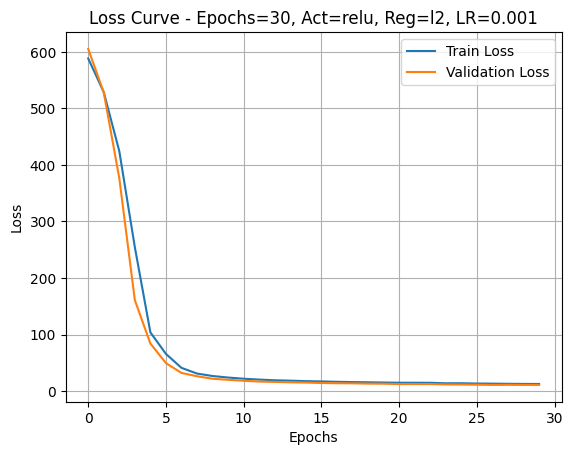

In [180]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title(f'Loss Curve - Epochs={epochs}, Act={activation}, Reg={reg_name}, LR={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# QUESTION 3

In [165]:
model1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1536      
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1665 (6.50 KB)
Trainable params: 1665 (6.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [181]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 128)               1792      
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
